In [ ]:
!pip install datasets

####Packages and Libraries

In [ ]:
#importing all the requried packages
import nltk
import pandas as pd
import string
from nltk.corpus import stopwords, wordnet
import re
from nltk.stem import WordNetLemmatizer
import unidecode
from nltk import pos_tag
from nltk import word_tokenize, sent_tokenize
from nltk.chunk import ne_chunk




In [ ]:
import spacy



In [ ]:
import scispacy

In [ ]:
import gensim
from gensim import corpora

### Dataset 1

#####NLTK Downloads

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
from datasets import load_dataset

ds = load_dataset("akemiH/NoteChat")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/207001 [00:00<?, ? examples/s]

#### Preprocessing

In [ ]:
print(ds)
ds_train = ds['train']
print(ds_train.features)
print(len(ds_train['data'][:]))

DatasetDict({
    train: Dataset({
        features: ['data', 'conversation'],
        num_rows: 207001
    })
})
{'data': Value(dtype='string', id=None), 'conversation': Value(dtype='string', id=None)}
207001


In [ ]:
df = pd.DataFrame(ds_train)



In [ ]:
df = df.iloc[:2000]

In [ ]:
print(df.isnull().sum())

data            0
conversation    0
dtype: int64


In [ ]:
df.describe()

,data,conversation
count,2000,2000
unique,2000,2000
top,This 60-year-old male was hospitalized due to ...,"\nDoctor: Hi, Mr. X, I'm Dr. Y. How are you fe..."
freq,1,1


Cleaning data

In [ ]:
#lowercasing all the characters
#i will be working with "data" column for this task
df['clean_data'] = df['data'].str.lower()
# df['clean_conv'] = df['conversation'].str.lower()
print(df['clean_data'][1])


a 39-year-old man was hospitalized due to an increasingly reduced general health condition, after persistent fever and dry cough for 2 weeks. the patient initially needed 4 l/min of oxygen, had a rapid and shallow breathing pattern at rest and became severely breathless during minor physical activities. in the beginning, physical therapy focused on patient education about dyspnea-relieving positions, the importance of regular mobilization, and deep-breathing exercises. however, it quickly became evident that his anxiety from fear of dying and worries about his future aggravated his dyspnea and vice versa. the patient was so dyspneic, anxious, and weak that he was barely able to walk to the toilet. to counter this vicious circle, the physical therapist actively listened to the patient, explained why he was experiencing breathlessness, and tested suitable positions to relieve his dyspnea. he seemed to benefit from the education and the relaxing breathing exercises, as seen on day 2, when

In [ ]:
print(string.punctuation)
print(type(string.punctuation))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
<class 'str'>


In [ ]:
#removing all the punctuations
#creating a function so it'll be easier to use for this dataset and the next one as well


def remove_punc(text):


  translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
  cleaned_text = text.translate(translator)

  return cleaned_text




In [ ]:
#implementing the punctuation removal function for dataset 1
# df['clean_data'] = df['clean_data'].apply(lambda x: remove_punc(x))
# # df['clean_conv'] = df['clean_conv'].apply(lambda x: remove_punc(x))
# print(df['clean_data'].head())

In [ ]:
#removing all the stopwords
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
  return " ".join([word for word in text.split() if word not in STOPWORDS])

In [ ]:
#implementng the stopwords function for dataset 1
df['clean_data'] = df['clean_data'].apply(lambda x: remove_stopwords(x))


In [ ]:
#removing all the special characters

#### creating ths functio but will most likeey not be usng it in this dataset because punctuation in medical data can lead to loss of information

# def remove_spl(text):
#   text = re.sub('[^a-zA-Z0-9]'," ", text)
#   text = re.sub("\s+", " ", text)
#   return text

#will not be using this as of now

In [ ]:
#lemmatization
def lem(text):

  lemme = WordNetLemmatizer()
  lemmatized_words = [lemme.lemmatize(word) for word in text.split()]
  return " ".join(lemmatized_words)


In [ ]:
df["lemme"]= df["clean_data"].apply(lambda x: lem(x)) #creating a separate solumn for just lemmetizaton because there is a chance that lemmetization may lead to loss of valuable medical information so it's god to preserve non-lemmatized clean data just in case


In [ ]:
df['lemme'][0]

'60-year-old male hospitalized due moderate ards covid-19 symptom fever, dry cough, dyspnea. encountered several difficulty physical therapy acute ward. first, change position deep breathing triggered coughing attack induced oxygen desaturation dyspnea. avoid rapid deterioration respiratory failure, instructed performed position change slowly step-by-step. way, position change 135° prone position () took around 30 minutes. approach well tolerated increased oxygen saturation, example, day 5 6 l/min oxygen 93% 97%. second, adapt breathing exercise avoid prolonged coughing oxygen desaturation. accordingly, instructed patient stop every deep breath need cough hold inspiration better air distribution. manner, patient performed breathing exercise well managed increase oxygen saturation. third, patient difficulty maintaining sufficient oxygen saturation physical activity. however, close monitoring frequent breaks, managed perform strength walking exercise low level without significant deoxyge

In [ ]:
def word_tokenize(text):
  return nltk.word_tokenize(text)

df['token']= df['clean_data'].apply(lambda x: word_tokenize(x))
df['token'][0]

#the dataset is too bog to be tokenized on my machine so I worked around this

####Features/Variables Exploration


#####General Exploration of data and techniques that could yield good results (optional to view): :

In [ ]:
token=word_tokenize(df['clean_data'][0])
tagged=pos_tag(token)
print(tagged)


[('60-year-old', 'JJ'), ('male', 'NN'), ('hospitalized', 'VBN'), ('due', 'JJ'), ('moderate', 'JJ'), ('ards', 'NNS'), ('covid-19', 'JJ'), ('symptoms', 'NNS'), ('fever', 'RB'), ('dry', 'JJ'), ('cough', 'NN'), ('dyspnea', 'NN'), ('encountered', 'VBD'), ('several', 'JJ'), ('difficulties', 'NNS'), ('physical', 'JJ'), ('therapy', 'NN'), ('acute', 'NN'), ('ward', 'NN'), ('first', 'RB'), ('change', 'JJ'), ('position', 'NN'), ('deep', 'NN'), ('breathing', 'NN'), ('triggered', 'VBD'), ('coughing', 'VBG'), ('attacks', 'NNS'), ('induced', 'VBN'), ('oxygen', 'IN'), ('desaturation', 'NN'), ('dyspnea', 'NN'), ('avoid', 'VBP'), ('rapid', 'JJ'), ('deterioration', 'NN'), ('respiratory', 'NN'), ('failure', 'NN'), ('instructed', 'VBD'), ('performed', 'JJ'), ('position', 'NN'), ('changes', 'NNS'), ('slowly', 'RB'), ('step-by-step', 'JJ'), ('way', 'NN'), ('position', 'NN'), ('change', 'NN'), ('135°', 'CD'), ('prone', 'NN'), ('position', 'NN'), ('took', 'VBD'), ('around', 'IN'), ('30', 'CD'), ('minutes', 'NN

In [ ]:
nouns = [word for word,tag in tagged if tag in ["NN", "NNS", "NNP", "NNPS"]]
print(nouns)


#Notes/Thoughts: This could be useful for narrowing down the dataset to extract diseases because diseases are going to be under nouns if we are not using a gneric spacy model

['male', 'ards', 'symptoms', 'cough', 'dyspnea', 'difficulties', 'therapy', 'acute', 'ward', 'position', 'deep', 'breathing', 'attacks', 'desaturation', 'dyspnea', 'deterioration', 'respiratory', 'failure', 'position', 'changes', 'way', 'position', 'change', 'prone', 'position', 'minutes', 'oxygen', 'saturation', 'example', 'day', 'lmin', 'oxygen', 'adapt', 'breathing', 'coughing', 'oxygen', 'desaturation', 'patient', 'stop', 'breath', 'cough', 'hold', 'inspiration', 'air', 'distribution', 'manner', 'patient', 'breathing', 'exercises', 'increase', 'oxygen', 'saturation', 'difficulty', 'oxygen', 'saturation', 'activity', 'breaks', 'strength', 'exercises', 'level', 'deoxygenation', 'exercise', 'progression', 'days', 'hospital', 'discharge', 'rehabilitation', 'day']


In [ ]:
chunked=ne_chunk(tagged)
print(chunked)

#this didn't really work for medical terms --> will require a medial model

(S
  60-year-old/JJ
  male/NN
  hospitalized/VBN
  due/JJ
  moderate/JJ
  ards/NNS
  covid-19/JJ
  symptoms/NNS
  fever/RB
  dry/JJ
  cough/NN
  dyspnea/NN
  encountered/VBD
  several/JJ
  difficulties/NNS
  physical/JJ
  therapy/NN
  acute/NN
  ward/NN
  first/RB
  change/JJ
  position/NN
  deep/NN
  breathing/NN
  triggered/VBD
  coughing/VBG
  attacks/NNS
  induced/VBN
  oxygen/IN
  desaturation/NN
  dyspnea/NN
  avoid/VBP
  rapid/JJ
  deterioration/NN
  respiratory/NN
  failure/NN
  instructed/VBD
  performed/JJ
  position/NN
  changes/NNS
  slowly/RB
  step-by-step/JJ
  way/NN
  position/NN
  change/NN
  135°/CD
  prone/NN
  position/NN
  took/VBD
  around/IN
  30/CD
  minutes/NNS
  approach/VBP
  well/RB
  tolerated/VBN
  increased/VBN
  oxygen/NN
  saturation/NN
  example/NN
  day/NN
  5/CD
  6/CD
  lmin/NN
  oxygen/NN
  93/CD
  97/CD
  second/JJ
  adapt/NN
  breathing/NN
  exercises/VBZ
  avoid/VBP
  prolonged/JJ
  coughing/NN
  oxygen/NN
  desaturation/NN
  accordingly/RB
  in

In [ ]:
nlp= spacy.load("en_core_web_sm")
doc= nlp(df['clean_data'][5])

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [ ]:
for token in doc:
    print(f"{token.text:<12} {token.pos_:<10} {token.dep_:<15}")

print("\nNamed Entities:")
for ent in doc.ents:
    print(f"{ent.text:<30} {ent.label_:<15}")

52           NUM        nummod         
-            PUNCT      punct          
year         NOUN       npadvmod       
-            PUNCT      punct          
old          ADJ        amod           
male         NOUN       nsubj          
tested       VERB       ROOT           
covid-19     PROPN      dative         
positive     ADJ        amod           
4            NUM        nummod         
days         NOUN       dobj           
beginning    VERB       acl            
dry          ADJ        amod           
cough        NOUN       compound       
fever        NOUN       compound       
head         NOUN       compound       
limb         NOUN       compound       
pain         NOUN       dobj           
one          NUM        nummod         
day          NOUN       npadvmod       
later        ADV        advmod         
hospitalized VERB       conj           
exertional   ADJ        amod           
dyspnea      NOUN       nsubj          
diagnosed    VERB       amod           


In [ ]:
nlp = spacy.load("en_core_sci_lg")
ner = nlp.get_pipe("ner")
print(ner.labels)

('ENTITY',)


In [ ]:
from spacy import displacy
doc = nlp(df['data'][0])
displacy.render(doc, style="ent", jupyter=True)

In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_scibert-0.5.4.tar.gz

  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_scibert-0.5.4.tar.gz (417.0 MB)
  Preparing metadata (setup.py) ... done


In [ ]:
from transformers import *

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be r

In [ ]:
nlp = spacy.load("en_core_sci_scibert")
ner = nlp.get_pipe("ner")
print(ner.labels)

/usr/local/lib/python3.10/dist-packages/spacy/language.py:2195: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]
loading configuration file /tmp/tmp2y9giv6t/config.json
Model config BertConfig {
  "_name_or_path": "/tmp/tmp2y9giv6t/config.json",
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 0.0,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.36.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 31090
}

loading file vocab.txt
loading file tokenizer.json
loading file added_tokens.json
loading file special_tokens_map.json
loading file tokenizer_confi

('ENTITY',)


In [ ]:
from spacy import displacy
doc = nlp(df['lemme'][0])
displacy.render(doc, style="ent", jupyter=True)

#####Actual implementation

General Analysis - Word Frequency Distribution

In [ ]:
df["punc"]= df["clean_data"].apply(lambda x: remove_punc(x))

In [ ]:
#exploring frequent wordsad if they may require removal
from collections import Counter
count = Counter()

for token in df['punc']:
  for word in token.split():
    count[word] += 1


In [ ]:
#exploring rare words and if they would require removal
count.most_common()[:-10:-1]

[('londrina', 1),
 ('angelus', 1),
 ('mta', 1),
 ('hedstrom', 1),
 ('oberkochen', 1),
 ('apexification', 1),
 ('endodontically', 1),
 ('león', 1),
 ('nuevo', 1)]

In [ ]:
#exploring common words and if they would require removal
count.most_common(20)

[('patient', 4271),
 ('showed', 2318),
 ('right', 2287),
 ('left', 2283),
 ('year', 2246),
 ('revealed', 2086),
 ('old', 2079),
 ('history', 1986),
 ('normal', 1944),
 ('2', 1808),
 ('examination', 1736),
 ('1', 1644),
 ('blood', 1617),
 ('mg', 1516),
 ('5', 1473),
 ('pain', 1451),
 ('l', 1416),
 ('3', 1397),
 ('performed', 1242),
 ('presented', 1159)]

Based on the above common word and NERs --> we could infer that age is possibly occuring in all 2000 samples (year, 2246). We could also conclude that patient history is also one of the variables, occuring in almost all the samples.

Feature: Age

In [ ]:
!pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5570 sha256=79853e8e27f2fd82b8ab41639930c7d9bfb7a453ce9a666210e8e3a71b32e159
  Stored in directory: /root/.cache/pip/wheels/84/ff/26/d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number


In [ ]:
from word2number import w2n

In [ ]:
age_pattern =  r'(\d+|\w+)\s*[-]?\s*(year|month|week|days|day|weeks|years|yr|y/o)\s*[-]?\s*(old)?'

def get_age(text):
  match = re.search(age_pattern, text, re.IGNORECASE)
  if match:
    if match.group(1).isdigit():
      number =int(match.group(1))
    else:
      try:
         number = w2n.word_to_num(match.group(1))
      except:
        return None

    if number is not None:
      if match.group(2)=='year' or match.group(2)=='years' or match.group(2)=='yr' or match.group(2)=='y/o':
        return [number]
      elif match.group(2)=='month' or match.group(2)=='months':
        return [number/12]
      elif match.group(2)=='week' or match.group(2)=='weeks':
        return [number/52]
      elif match.group(2)=='day' or match.group(2)=='days':
        return [number/365]




        # return [(match.group(2))]


In [ ]:
df['age'] = df['clean_data'].apply(get_age)

In [ ]:
df['age']


,age
0,60
1,39
2,0
3,69
4,57
...,...
1995,78
1996,35
1997,47
1998,84


In [ ]:
df= filtered_df = df[df['age'].notna()]
df.describe()

,data,conversation,clean_data,lemme,punc,age
count,1991,1991,1991,1991,1991,1991
unique,1991,1991,1991,1991,1991,133
top,This 60-year-old male was hospitalized due to ...,"\nDoctor: Hi, Mr. X, I'm Dr. Y. How are you fe...",60-year-old male hospitalized due moderate ard...,60-year-old male hospitalized due moderate ard...,60 year old male hospitalized due moderate ard...,[65]
freq,1,1,1,1,1,42


Feature: Sex

In [ ]:
sex_pattern= r'male|female|man|woman|she|he|her|him|girl|boy|guy'

def get_sex(text):
  match = re.search(sex_pattern, text)
  if match:
    if match.group(0) == 'male' or match.group(0)=='man' or match.group(0)=='him' or match.group(0)=='he'or match.group(0)=='boy' or match.group(0)=='guy':
      return ['male']
    elif match.group(0) == 'female' or match.group(0)=='woman'  or match.group(0)=='her' or match.group(0)=='she' or match.group(0)=='girl':
      return ['female']
  return ["N/A"]

In [ ]:
df['sex'] = df['clean_data'].apply(get_sex)

<ipython-input-37-c5b40c034b2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['clean_data'].apply(get_sex)


Feature: Diseases

In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_bc5cdr_md-0.5.4.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en_ner_bc5cdr_md: filename=en_ner_bc5cdr_md-0.5.4-py3-none-any.whl size=119787678 sha256=30bf8a707637cb0fd79c2156c191c087366a29df9ba6635d8ef319eb6b8bec9d
  Stored in directory: /root/.cache/pip/wheels/56/ff/94/8c86b3e1b0ac75480c6f3179eb33bf970c05d0be9ff2230b77
Successfully built en_ner_bc5cdr_md


In [ ]:
nlp = spacy.load("en_ner_bc5cdr_md")
def get_disease(text):
  doc= nlp(text)
  diseases = []
  for ent in doc.ents:
    if ent.label_ == 'DISEASE':
      diseases.append(ent.text)
  return diseases


/usr/local/lib/python3.10/dist-packages/spacy/language.py:2195: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]


In [ ]:
df['diseases'] = df['data'].apply(get_disease)

<ipython-input-40-6d447f948625>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diseases'] = df['data'].apply(get_disease)


In [ ]:
df.describe()

,data,conversation,clean_data,lemme,punc,age,sex,diseases
count,1991,1991,1991,1991,1991,1991,1991,1991
unique,1991,1991,1991,1991,1991,133,2,1984
top,This 60-year-old male was hospitalized due to ...,"\nDoctor: Hi, Mr. X, I'm Dr. Y. How are you fe...",60-year-old male hospitalized due moderate ard...,60-year-old male hospitalized due moderate ard...,60 year old male hospitalized due moderate ard...,[65],[male],[]
freq,1,1,1,1,1,42,1132,5


In [ ]:
df['diseases']

,diseases
0,"[ARDS, fever, dry cough, dyspnea, oxygen desat..."
1,"[fever, dry cough, anxiety, dyspnea, dyspneic,..."
2,"[tachypnea, dyspnea, dyspneic, profoundly redu..."
3,"[cough, pneumonia, ARDS, nerve lesions, ulcer,..."
4,"[dyspnea, dry cough, fever, respiratory failur..."
...,...
1995,"[rheumatoid arthritis, RA, pulmonary emphysema..."
1996,"[fishbone, pain, abdominal pain, fever, liver ..."
1997,"[sudden epigastric pain, shock, gastric ulcer ..."
1998,"[impaired consciousness, dementia, aphonia, hy..."


####Data Distribution

In [ ]:
type(df['age'][0])

list

In [ ]:
# Convert age column from list to integer
df['age'] = df['age'].apply(lambda x: int(x[0]) if isinstance(x, list) else int(x))

<ipython-input-46-94d7c466dc79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].apply(lambda x: int(x[0]) if isinstance(x, list) else int(x))


In [ ]:
df['age']

,age
0,60
1,39
2,0
3,69
4,57
...,...
1995,78
1996,35
1997,47
1998,84


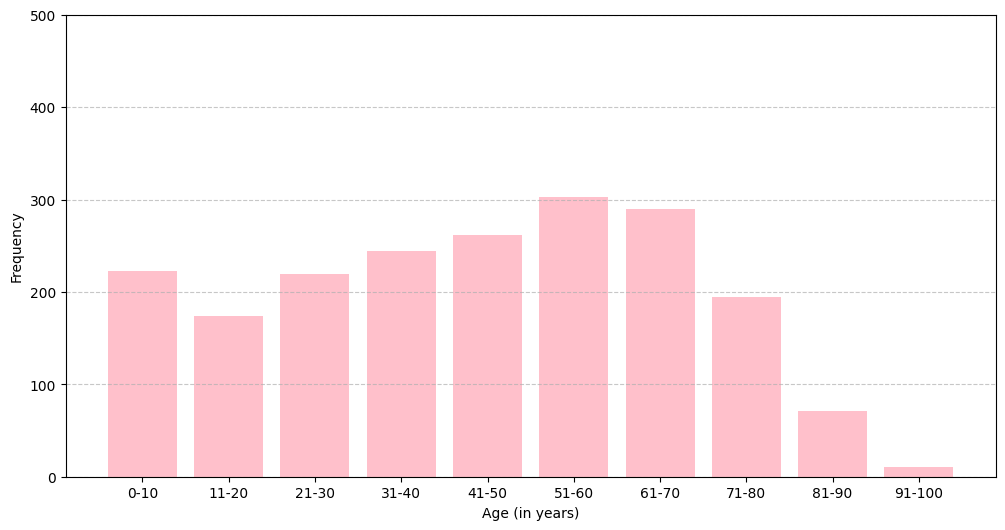

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

bins = [0,10,20,30,40,50,60,70,80,90,100]

labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
# age_frequencies = df['age'].value_counts(dropna=False).sort_index()

age_binned = pd.cut(df['age'], bins=bins, labels=labels, right=False)
age_frequencies = age_binned.value_counts().sort_index()


plt.figure(figsize=(12, 6))
plt.bar(age_frequencies.index, age_frequencies.values, color='pink')


plt.xlabel('Age (in years)')
plt.ylabel('Frequency')


plt.ylim(0, 500)


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# 0 age is in weeks --> decimal was rounded down to zero

In [ ]:
# Convert gender column from list to str
df['sex'] = df['sex'].apply(lambda x: x[0] if isinstance(x, list) else int(x))

<ipython-input-49-0f1d3b05562b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].apply(lambda x: x[0] if isinstance(x, list) else int(x))


In [ ]:
gender_counts = df['sex'].value_counts()

In [ ]:
gender_counts

,count
sex,
male,1132
female,859


<ipython-input-52-d21a73caf935>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gen_merge = df.groupby([age_binned, 'sex']).size().unstack(fill_value=0)


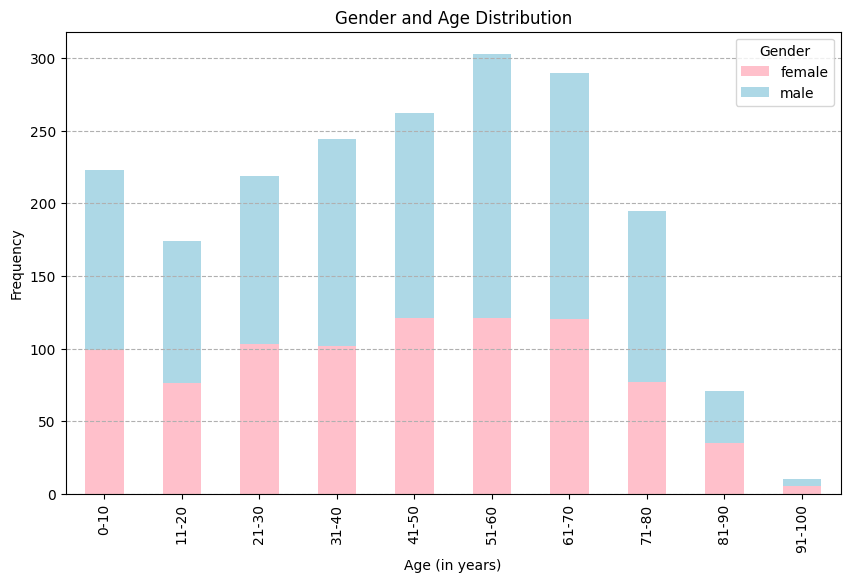

In [ ]:
#merging gender with age
bins = [0,10,20,30,40,50,60,70,80,90,100]

labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
# age_frequencies = df['age'].value_counts(dropna=False).sort_index()

age_binned = pd.cut(df['age'], bins=bins, labels=labels, right=False)
# age_frequencies = age_binned.value_counts().sort_index()

age_gen_merge = df.groupby([age_binned, 'sex']).size().unstack(fill_value=0)

graph = age_gen_merge.plot(kind='bar', stacked=True, figsize=(10, 6), color=["pink", "lightblue"])

# plt.figure(figsize=(12, 6))
# plt.bar(age_frequencies.index, age_frequencies.values, color='pink')


plt.xlabel('Age (in years)')
plt.ylabel('Frequency')
plt.title('Gender and Age Distribution')

plt.grid(axis='y', linestyle='--')

plt.legend(title='Gender')


plt.show()

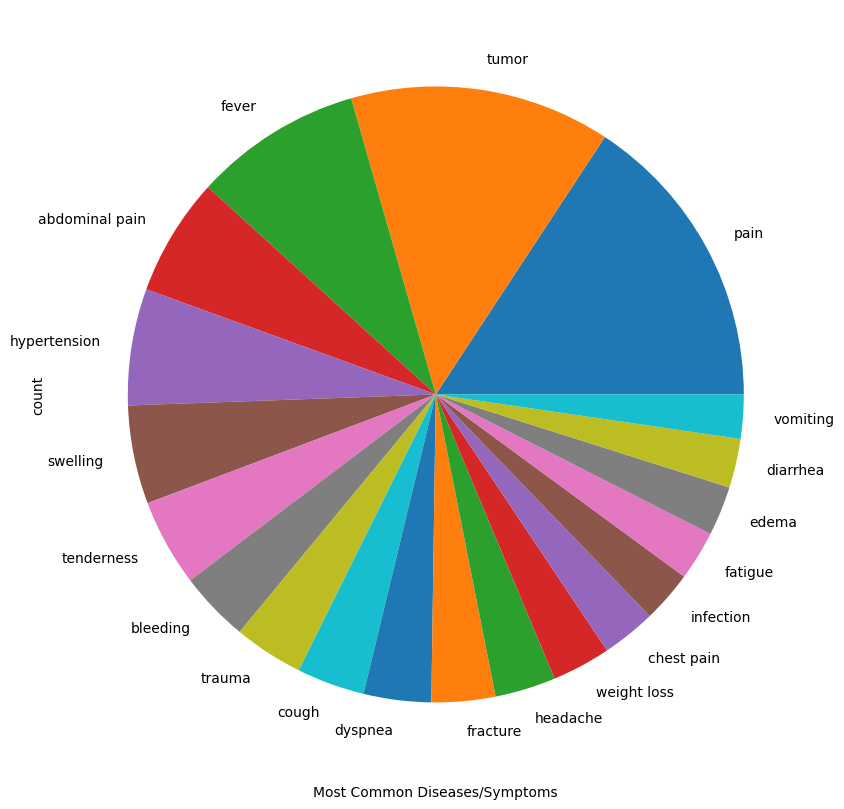

In [ ]:
diseases_counts = df['diseases'].explode().value_counts()
diseases_counts= diseases_counts.head(20)
diseases_counts.plot(kind='pie', figsize = (20,10))

plt.xlabel("Most Common Diseases/Symptoms") #could be separated with further analysis


plt.show()
#

##Working on refining these further.

Next steps :
-Group gender and age by the disease
-Further refine the diseases column to separate symptoms from diseases and history